In [ ]:
import numpy as np
import pandas as pd

sf = pd.read_excel('student_details.xlsx')
sf

In [ ]:
import numpy as np
import pandas as pd
# sf.head(10)
# sf.tail(10)
# sf['Name'].nunique()
# sf['Name'].unique()
sf.info()
sf = pd.read_excel('student_details.xlsx')
# sf.describe()

In [ ]:
names = sf['Name']
subset = sf[['Name','GPA']]
subset

In [ ]:
# Sorting & Filtering

high_gpa = sf[sf['GPA'] > 3.5]
high_gpa_males = sf[(sf['GPA'] > 3.5) & (sf['Gender'] == 'M')]
high_gpa_males = high_gpa_males.sort_values(by='GPA')
high_gpa_males = high_gpa_males.sort_values(by=['Major','GPA','StudentID'],ascending=[False, False, True])
high_gpa_males

In [ ]:
# Grouping Data

# sf['GPA'].mean()
grp1 = sf.groupby(['Major','Gender'])['GPA'].mean()
grp1
grp2 = sf.groupby(['Name', 'Age']).size()
grp2

In [ ]:
# Missing values

mv = sf.isnull().sum()
mv_filled = sf.fillna(0)
mv_filled

In [91]:
# Adding/Modifying Columns

sf['Graduated'] = sf['GPA'] == 4.00
df = sf[sf['GPA'] == 4.00]
df_grp = df.drop_duplicates('Name')
df_grp
# df

,StudentID,Name,Age,Gender,Major,GPA,Graduated
549,550,Hannah,23,M,History,4.0,True
592,593,Bob,23,F,Mathematics,4.0,True
802,803,George,19,F,Engineering,4.0,True
1342,1343,Alice,23,F,Chemistry,4.0,True
2807,2808,David,21,M,History,4.0,True
3965,3966,Charlie,20,F,Economics,4.0,True
4600,4601,Eva,23,F,History,4.0,True
6761,6762,Fiona,20,M,Chemistry,4.0,True


In [ ]:
# Pivot Tables

pivot = df_grp.pivot_table(values= 'Graduated', index='Major', columns='Name', aggfunc='count', fill_value=0)
pivot

In [87]:
# Reshaping Data

melted_df = df.melt(id_vars=['StudentID', 'Name'], value_vars=['GPA', 'Age'])
melted_df.sort_index()

,StudentID,Name,variable,value
0,550,Hannah,GPA,4.0
1,593,Bob,GPA,4.0
2,803,George,GPA,4.0
3,910,George,GPA,4.0
4,1199,George,GPA,4.0
...,...,...,...,...
149,28084,Alice,Age,23.0
150,28691,Charlie,Age,22.0
151,28975,Fiona,Age,22.0
152,29213,Charlie,Age,21.0


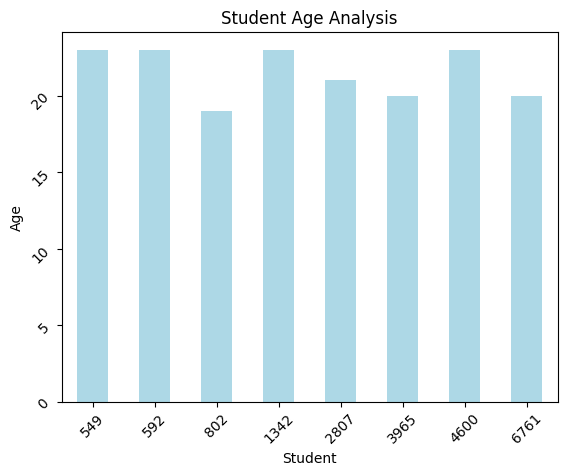

In [195]:
# Data Visualization

import matplotlib.pyplot as plt
import scipy as spy
# sf.plot(kind='scatter')
df_grp['Age'].plot(kind='bar',color='lightblue')
# plt.show()
plt.xlabel('Student', loc='center')
plt.ylabel('Age', loc='center')
plt.title('Student Age Analysis', loc='center')
# labels = df_grp['Name']
plt.xticks(rotation=45)
plt.yticks(rotation=45)
# plt.grid()
# plt.subplot(3, 3, 4)
# plt.figure(figsize=(80,100))
plt.savefig('modified_std.jpg', dpi=200)

In [123]:
sf

,StudentID,Name,Age,Gender,Major,GPA,Graduated
0,1,Alice,18,M,Chemistry,3.76,False
1,2,Hannah,24,F,Biology,2.04,False
2,3,Charlie,21,M,Biology,2.16,False
3,4,George,23,M,Biology,2.27,False
4,5,Bob,24,F,Economics,2.64,False
...,...,...,...,...,...,...,...
29995,29996,George,22,F,Mathematics,2.33,False
29996,29997,Alice,23,M,Economics,3.90,False
29997,29998,Charlie,18,M,Chemistry,2.09,False
29998,29999,David,22,F,Mathematics,3.95,False


In [163]:
df_grp.to_excel('modified_std.xlsx', index=False)